# **Esempio 2. *Clustering* supervisionato per lo stato fisico di derivati del metano**

In questo esempio verrà addestrato un algoritmo di catalogazione multiclasse basato sul KNN clustering su un dataset di derivati del metano, costituiti scegliendo tra un insieme limitato di sostituenti (H, F, Cl, Br, NH<sub>2</sub>, OH, SH).

Si useranno come descrittori molecolari: l'entalpia standard di formazione ($\Delta_\textrm{f}H^\ominus$), l'energia libera di Gibbs standard di formazione ($\Delta_\textrm{f}G^\ominus$) e la capacità termica standard a pressione costante ($c_p^\ominus$) a 298.15 K. [*Perché non anche l'entropia standard di formazione? Che tipo di dato sarebbe rispetto a quelli già selezionati?*]

L'etichetta per la supervisione dell'apprendimeno potrà prendere un valore tra 0 (solido), 1 (liquido) o 2 (gassoso).

Se necessario, si installino prima le seguenti librerie.

In [1]:
%%capture
!pip install rdkit
!pip install git+https://github.com/mordred-descriptor/mordred
!pip install py3Dmol

La cella che segue richiama le librerie che serviranno.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import pandas as pd
import numpy as np

## **Dataset**
Si carica il dataset di esempi in un `DataFrame` di `pandas`.

In [3]:
url = 'https://drive.google.com/file/d/148XxvJ7j_PpFKt9WNtYwig10xf9qHLtM/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

data = pd.read_table(url, encoding='windows-1252', delimiter=';')

display(data)

Cabcd         SMILES    DHf0    DGf0     cp0  fase
0      CH4              C  -17.88  -12.13   8.439     2
1    CH3OH             CO  -57.04  -39.79  19.500     1
2    CH2F2            FCF -106.80 -100.20  10.250     2
3     CHF3         FC(F)F -164.50 -156.30  12.200     2
4    CH3Cl            CCl  -19.32  -13.72   9.740     2
5   CH2Cl2          ClCCl  -29.03  -16.09  23.900     1
6     CCl4  ClC(Cl)(Cl)Cl  -32.37  -15.60  31.490     1
7    CFCl3   FC(Cl)(Cl)Cl  -72.02  -56.61  29.050     1
8     CBr4  BrC(Br)(Br)Br    4.50   11.40  34.500     0
9     CH3I             CI   -3.70    3.20  30.000     1
10  CH3NH2             CN   -5.49   -7.67  12.700     2
11   CH3SH             CS   -5.34   -2.23  12.010     2

*Scatter matrix* usando la fase come codice colore.

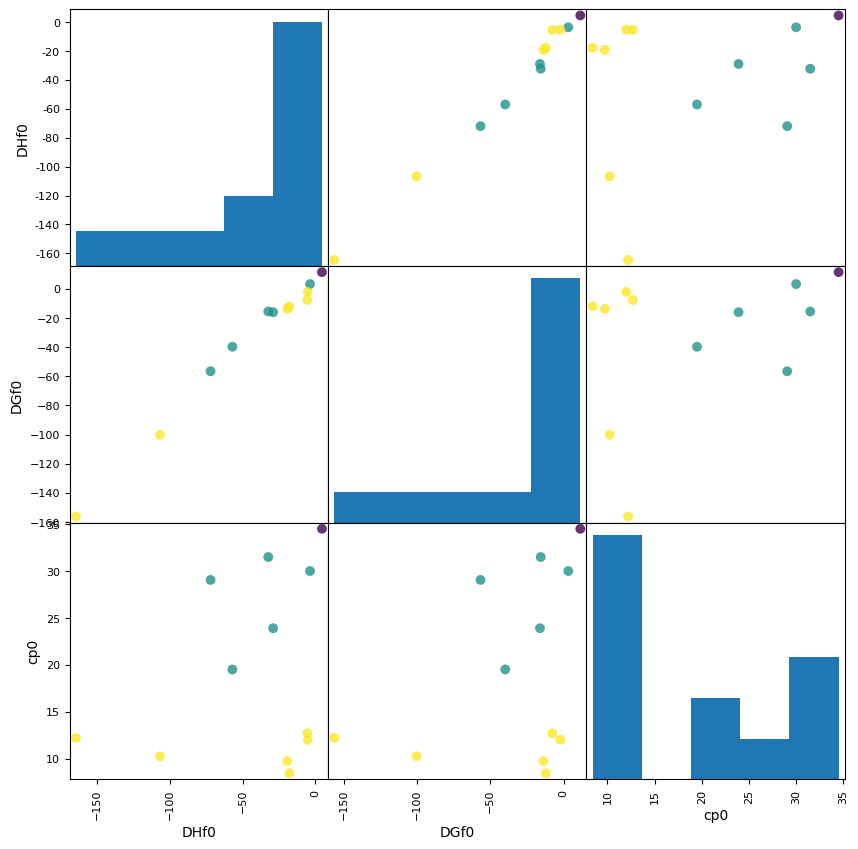

In [4]:
colors = data['fase']
grr = pd.plotting.scatter_matrix(data[['DHf0', 'DGf0', 'cp0']], c = colors, figsize=(10, 10), marker='o', hist_kwds={'bins': 5}, s=50, alpha=0.8)

## **Addestramento**

Nella cella che segue vengono separati gli esempi in queli di *training* e di test.

In [5]:
features = ['DHf0', 'DGf0', 'cp0']
labels = ['fase']

X = data[features]
y = data[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3) # 70% training and 30% test

Nella cella che segue viene allocato il classificatore basato sull'algoritmo *k neearest neighbor* in cui si deve impostare il numero *k* primi vicini che "votano" per la classificazione di un dato.

In [6]:
neigh = KNeighborsClassifier(n_neighbors=2)    # 2 primi vicini votano
neigh.fit(X_train, y_train.to_numpy().ravel()) # addestramento

KNeighborsClassifier(n_neighbors=2)

Infine, si procede con il test. Nella tabella, oltre al confronto tra l'etichetta di test e la previsione fatta dall'algoritmo, vengono riportate le probabilità che ciascun punto possa essere catalogato in ciascuna delle categorie. L'algoritmo sceglie la categoria con probabilità maggiore, o a caso quando si verifica un pareggio.

In [7]:
y_pred = np.array(neigh.predict(X_test))
prob = neigh.predict_proba(X_test)

y_pred = y_pred.ravel()
outdata = pd.DataFrame({'Fase':y_test['fase'], 'Predizione':y_pred, 'Prob(s)':prob[:,0], 'Prob(l)':prob[:,1], 'Prob(g)':prob[:,2]})
display(outdata)

print ('\nScore = ', neigh.score(X_test, y_test))

Fase  Predizione  Prob(s)  Prob(l)  Prob(g)
5     1           1      0.0      0.5      0.5
4     2           2      0.0      0.0      1.0
1     1           1      0.0      1.0      0.0
2     2           1      0.0      0.5      0.5


Score =  0.75


Si noti che l'efficacia dell'algoritmo (in questo caso, come negli altri esempi) è fortemente dipendente dalla scelta dei parametri e dell'iperparametro. Tale instabilità dell'algortimo è dovuta all'estensione molto limitata del dataset.